In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import os
working_dir = os.getcwd()
# Step 10: Create a plot (will be done after completing Task 1)


In [17]:
# Step 1: Load and preprocess the data
train_data = pd.read_csv(f"{working_dir}/data/TrainData.csv")
train_data['Wind_Direction'] = np.arctan2(train_data['V10'], train_data['U10']) * 180 / np.pi
X = train_data[['WS10', 'Wind_Direction']]
y = train_data['POWER']

# Step 2: Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
# Step 3: Train the MLR model
mlr = LinearRegression()
mlr.fit(X_train, y_train)

# Step 4: Load and preprocess the weather forecast input data
forecast_input = pd.read_csv(f"{working_dir}/data/WeatherForecastInput.csv")
forecast_input['Wind_Direction'] = np.arctan2(forecast_input['V10'], forecast_input['U10']) * 180 / np.pi
X_forecast = forecast_input[['WS10', 'Wind_Direction']]

In [19]:
# Step 5: Predict wind power generation
power_predictions = mlr.predict(X_forecast)

# Step 6: Load the true wind power measurements
solution = pd.read_csv(f"{working_dir}/data/Solution.csv")
y_true = solution['POWER']

In [20]:
# Step 7: Calculate the RMSE
rmse = np.sqrt(mean_squared_error(y_true, power_predictions))
print("RMSE: ", rmse)

# Step 8: Compare the prediction accuracy (will be done after completing Task 1)
# Step 9: Save the predicted wind power production
forecast_template = pd.read_csv(f"{working_dir}/data/ForecastTemplate.csv")
forecast_template['Power'] = power_predictions
forecast_template.to_csv(f"{working_dir}/results/ForecastTemplate2.csv", index=False)

RMSE:  0.215612977515618


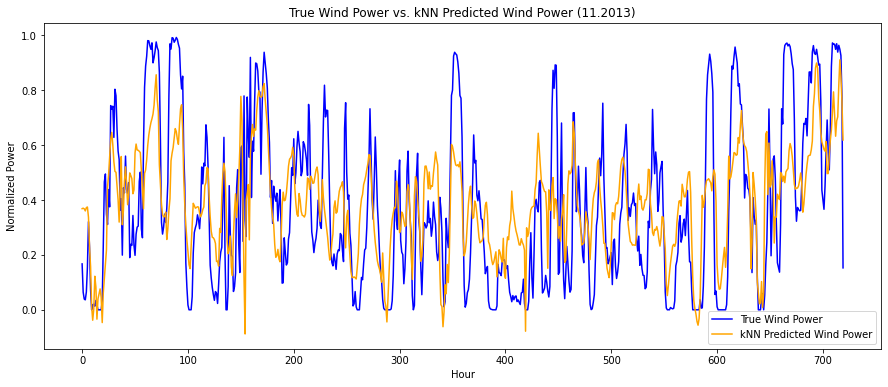

In [22]:
plt.figure(figsize=(15, 6))
plt.plot(y_true, label='True Wind Power', color='blue')
plt.plot(power_predictions, label='kNN Predicted Wind Power', color='orange')
plt.legend()
plt.title('True Wind Power vs. kNN Predicted Wind Power (11.2013)')
plt.xlabel('Hour')
plt.ylabel('Normalized Power')
plt.show()

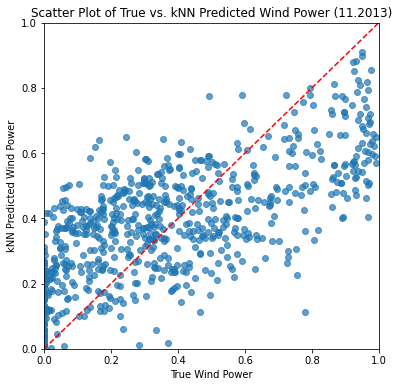

In [23]:
plt.figure(figsize=(6, 6))
plt.scatter(y_true, power_predictions, alpha=0.7)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('True Wind Power')
plt.ylabel('kNN Predicted Wind Power')
plt.title('Scatter Plot of True vs. MLR Predicted Wind Power (11.2013)')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()